<a href="https://colab.research.google.com/github/beyzoskaya/machineLearning_CS454/blob/main/exercises/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('./gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [23]:
df.shape

(847, 2)

In [24]:
print(f"Date range of gold prices available from {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [25]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [26]:
column_headers = list(df.columns.values)
column_headers

['Date', 'Price']

In [27]:
print(df.columns)

Index(['Date', 'Price'], dtype='object')


In [28]:
# change the column of date to monthly date
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


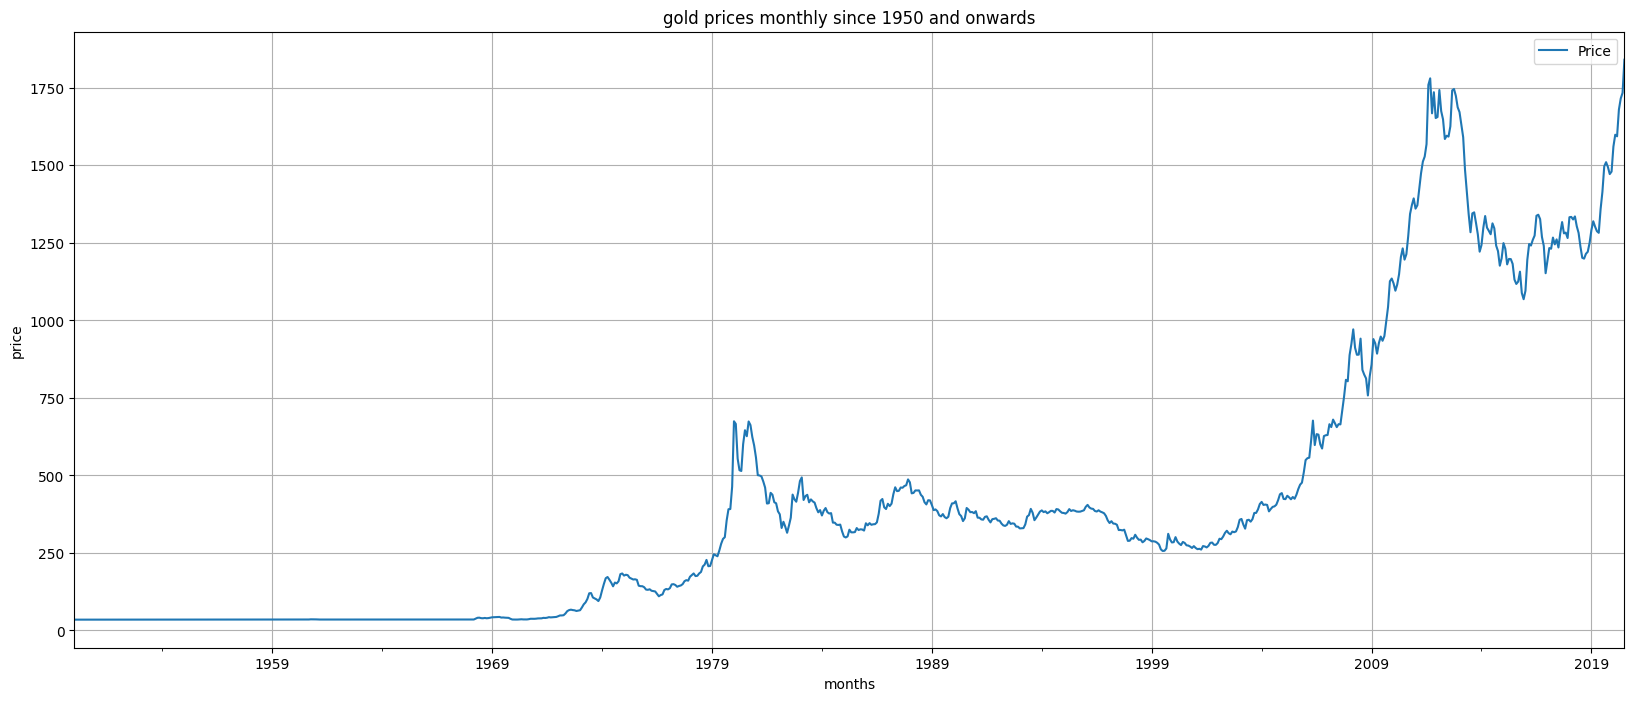

In [30]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

In [31]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


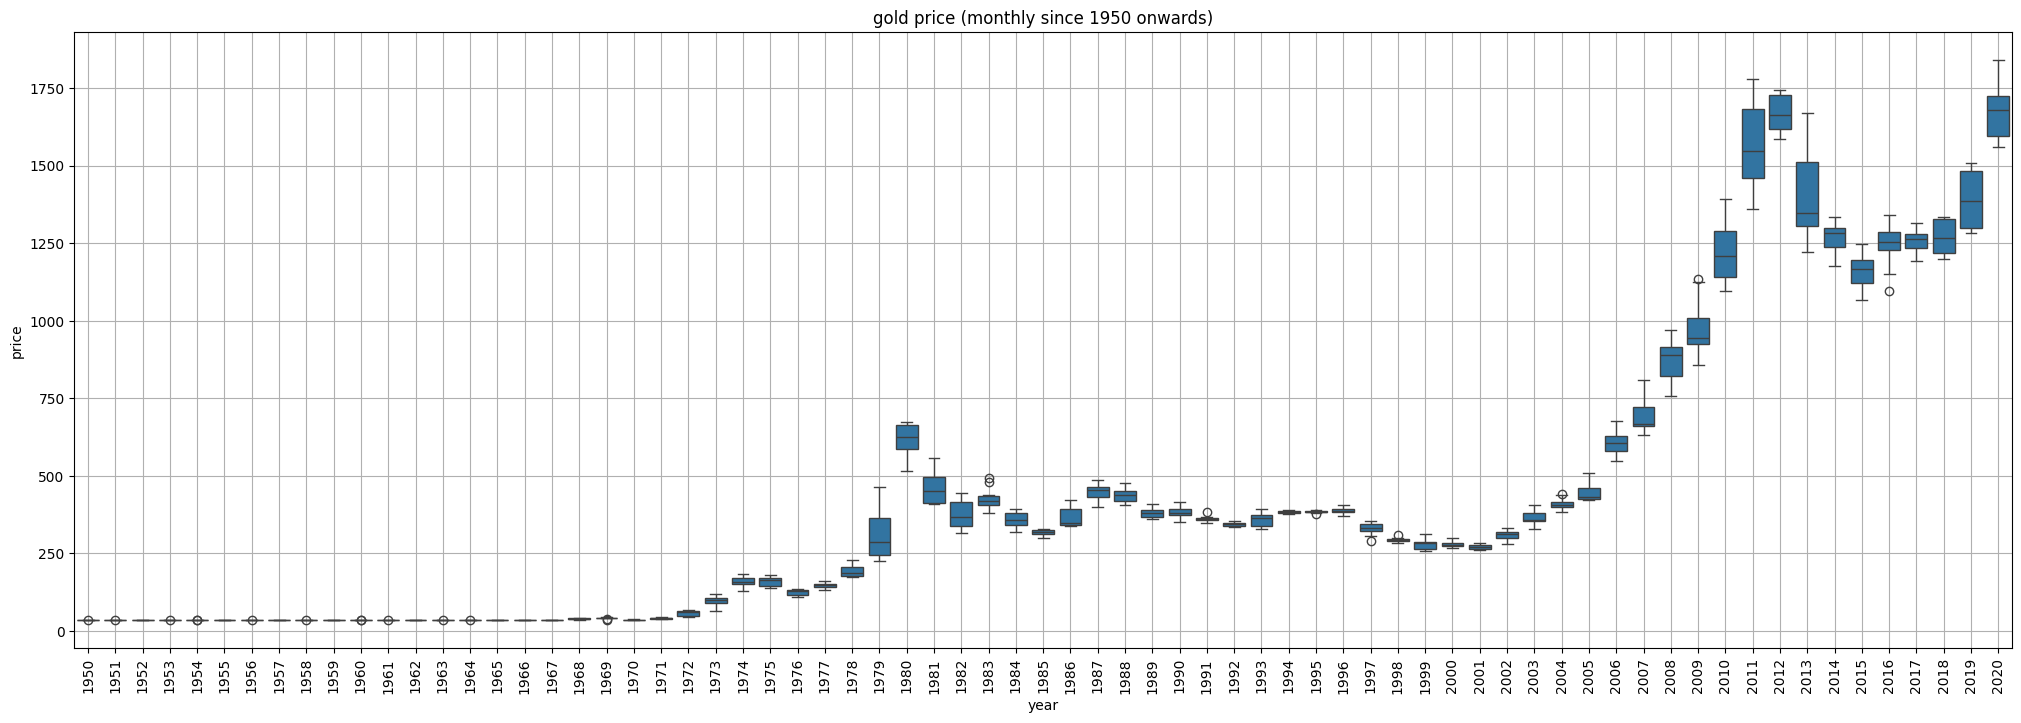

In [32]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title('gold price (monthly since 1950 onwards)')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

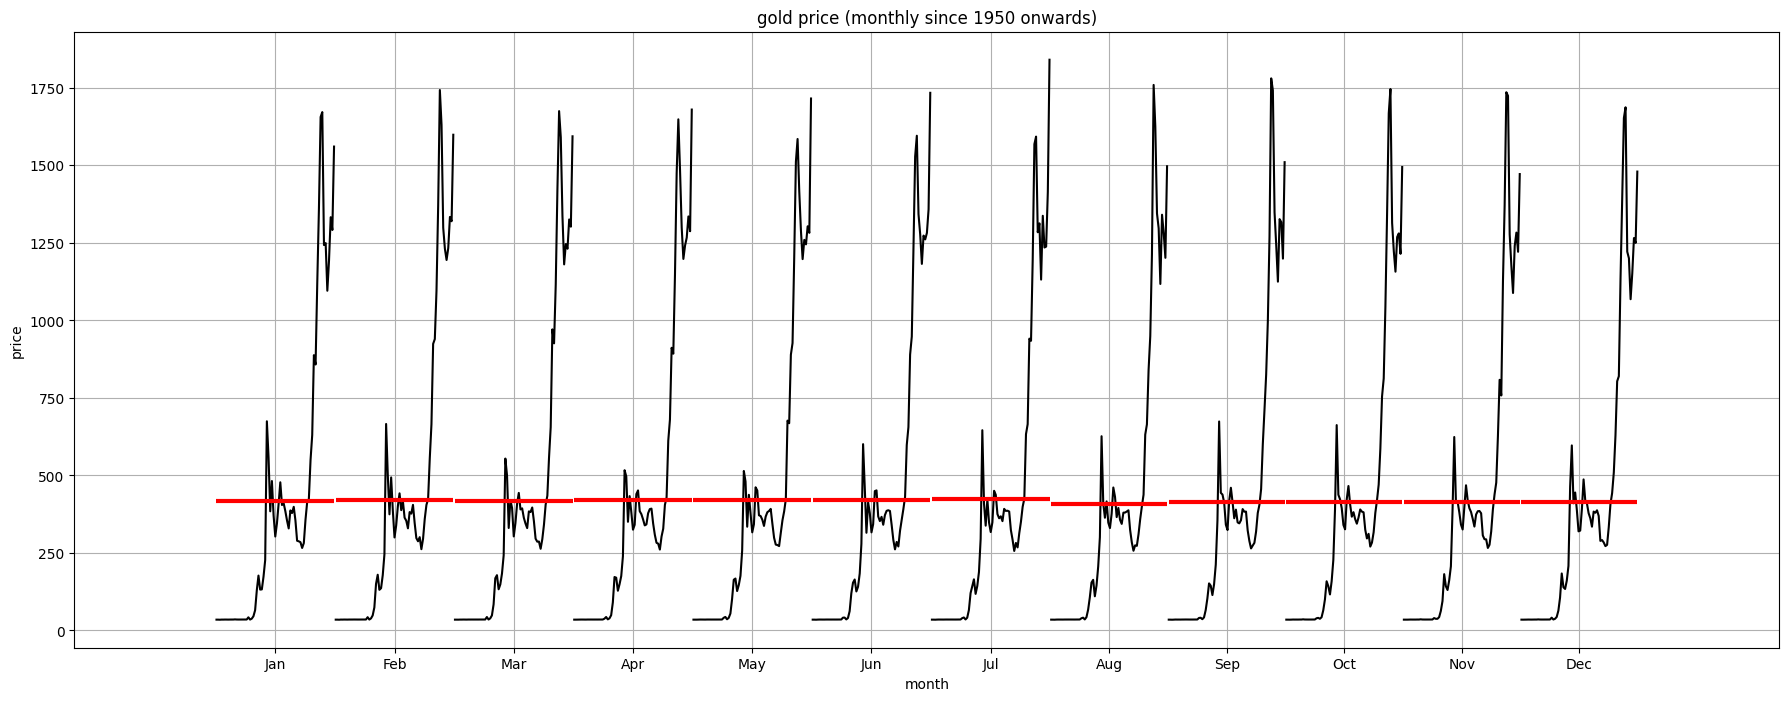

In [33]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='gold price', ax=ax)
plt.title('gold price (monthly since 1950 onwards)')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [34]:
df.values[:,0]

array([  34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
         34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.72 ,
         34.72 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
         34.72 ,   34.71 ,   34.71 ,   34.71 ,   34.73 ,   34.66 ,
         34.49 ,   34.49 ,   34.68 ,   34.82 ,   34.73 ,   34.53 ,
         34.57 ,   34.58 ,   34.51 ,   34.63 ,   34.72 ,   34.79 ,
         34.88 ,   34.95 ,   34.92 ,   34.93 ,   34.9  ,   34.89 ,
         34.91 ,   34.91 ,   34.76 ,   34.79 ,   34.86 ,   34.85 ,
         34.86 ,   34.88 ,   34.92 ,   35.04 ,   35.08 ,   35.07 ,
         35.08 ,   35.05 ,   35.08 ,   35.08 ,   35.06 ,   35.04 ,
         35.04 ,   35.05 ,   35.06 ,   35.05 ,   35.05 ,   35.04 ,
         35.05 ,   35.03 ,   34.98 ,   34.98 ,   34.98 ,   34.97 ,
         34.99 ,   34.99 ,   34.99 ,   34.98 ,   34.99 ,   34.98 ,
         35.   ,   35.02 ,   35.01 ,   35.02 ,   34.98 ,   34.9  ,
         34.88 ,   34.89 ,   34.91 ,   34.92 ,   34.93 ,   34.

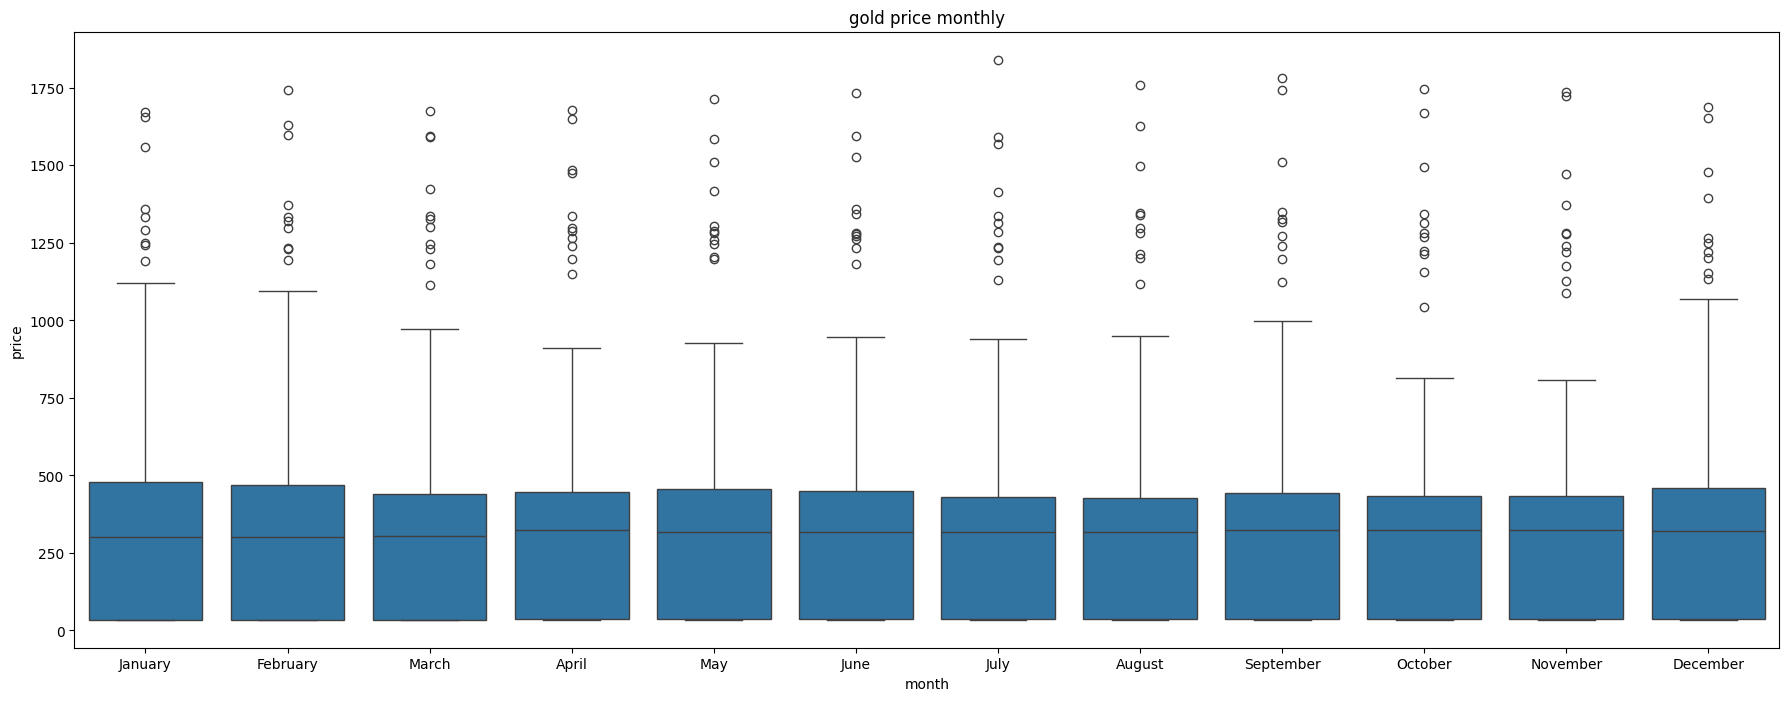

In [37]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('gold price monthly')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

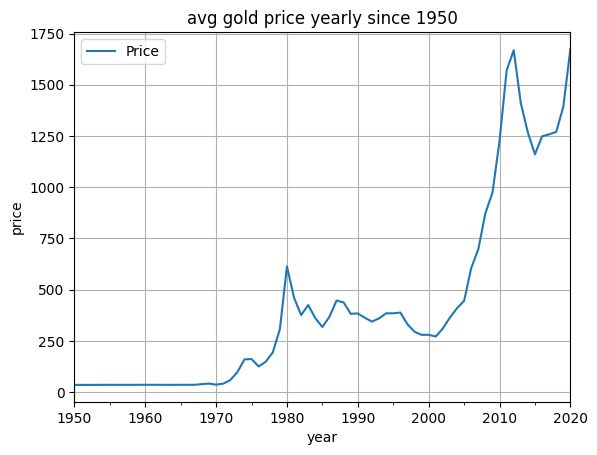

In [39]:
df_yearly_sum = df.resample('A').mean() # A represents annual frequency
df_yearly_sum.plot()
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

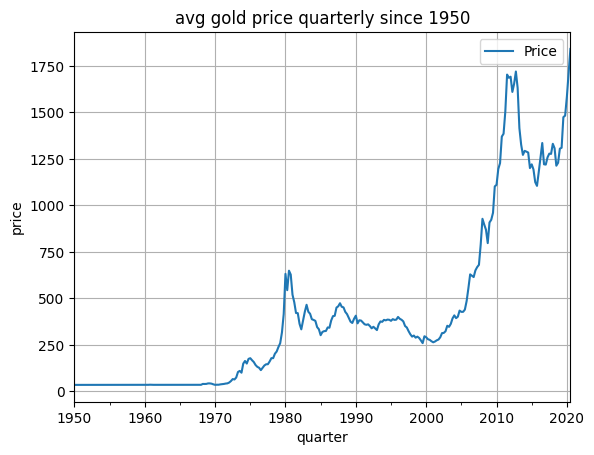

In [41]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('avg gold price quarterly since 1950')
plt.xlabel('quarter')
plt.ylabel('price')
plt.grid()

In [42]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


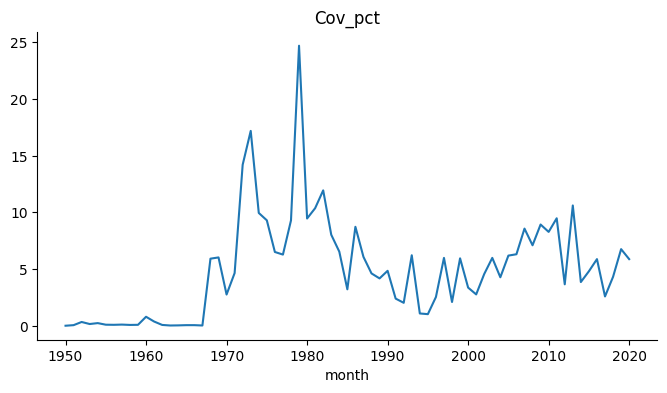

In [43]:
# @title Cov_pct

from matplotlib import pyplot as plt
df_1['Cov_pct'].plot(kind='line', figsize=(8, 4), title='Cov_pct')
plt.gca().spines[['top', 'right']].set_visible(False)

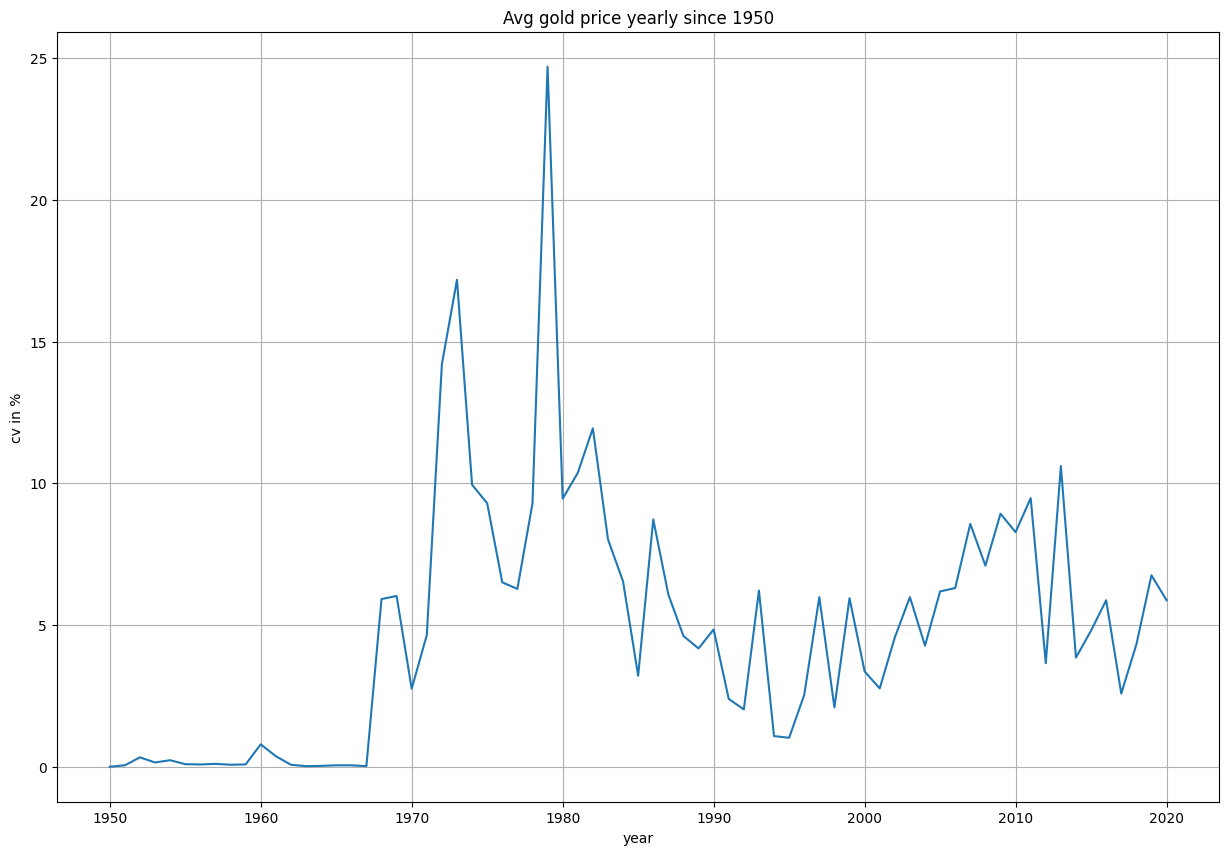

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [46]:
df[df.index.year <= 2015]

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2015-08-31,1117.525
2015-09-30,1124.905
2015-10-31,1157.123


In [47]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [48]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


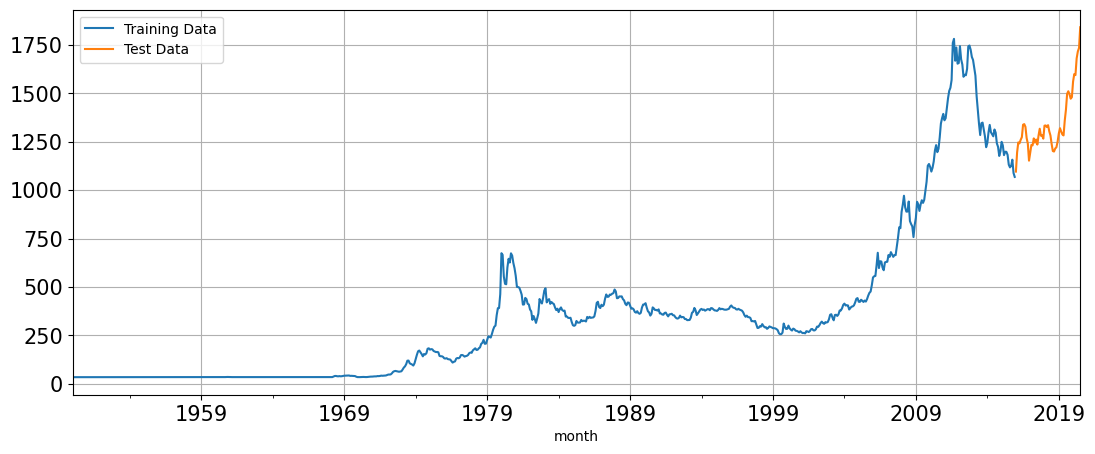

In [49]:
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [50]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [51]:
LR_train = train.copy()
LR_test = test.copy()

In [52]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [53]:
lr = LinearRegression()
lr.fit(LR_train[
    ['time']],
    LR_train['Price'].values)

LinearRegression()

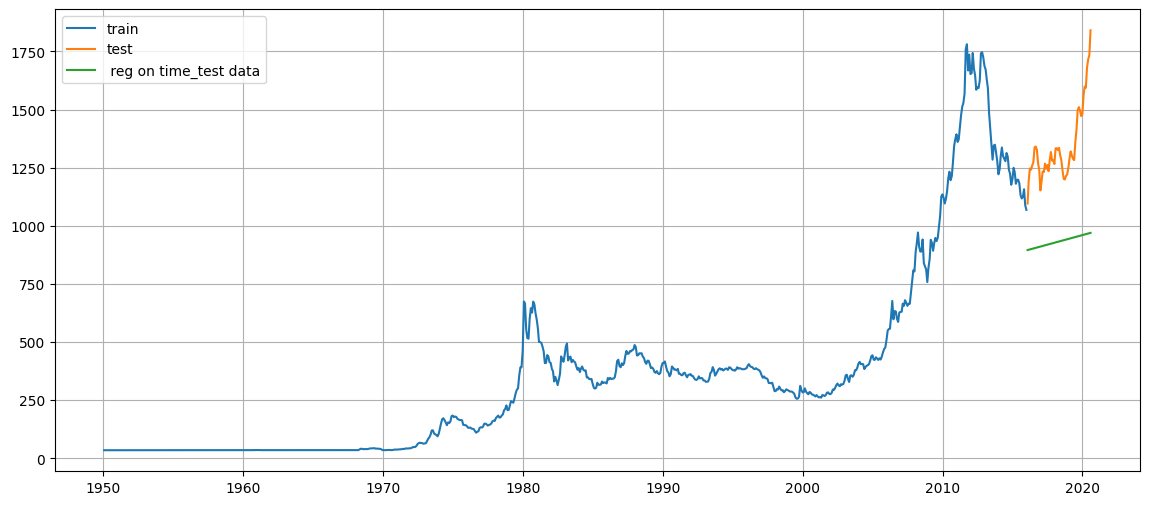

In [56]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label=' reg on time_test data')
plt.legend(loc='best')
plt.grid()

In [59]:
def mape(actual, pred):
  return round((np.mean(abs(actual - pred) / actual))*100,2)

In [62]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%") # mean absolute percentage error

MAPE is 29.760 %


In [65]:
results = pd.DataFrame({'Test Mape(%)': [mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape(%)
RegressionOnTime,29.76


In [66]:
final_model = ExponentialSmoothing(df,
                                   trend='additive').fit(smoothing_level=0.4,smoothing_trend=0.3,smoothing_seasonal=0.6)

In [67]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE is %3.3f"%(Mape_final_model), "%")

MAPE is 3.260 %


In [68]:
predictions = final_model.forecast(steps=len(test))

In [69]:
pred_df = pd.DataFrame({'lower_CI': predictions-1.96*np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions+1.96*np.std(final_model.resid, ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1775.919152,1840.525611,1905.132070
2020-09-30,1820.621188,1885.227647,1949.834105
2020-10-31,1865.323223,1929.929682,1994.536141
2020-11-30,1910.025259,1974.631718,2039.238176
2020-12-31,1954.727294,2019.333753,2083.940212
